# Simple RAG using HuggingFace

This notebook provides a comprehensive visualization of text vectorization and demonstrates the power of vector search in processing and understanding natural language data. Moreover, it demonstrates the main steps of RAG in a simplified format. </br>

------------------------------------------------------------------------------------
### Dependencies:
To achieve our goals, we rely on the following libraries and models:

>- **BAAI/bge-large-zh-v1.5**: This is the embedding model we use, which has an embedding dimension of 1024. It is designed to capture the semantic meaning of text in a high-dimensional space.
>- **Google/Flan-t5-base**
>- **sklearn.metrics.pairwise.cosine_similarity**: : A function from the scikit-learn library that allows us to compute the similarity between vectors.
>- **sklearn.decomposition.PCA**: Another scikit-learn tool that we use to perform Principal Component Analysis (PCA), reducing the dimensionality of our embeddings to 2 and 3 dimensions for visualization purposes.
>- **matplotlib**: A plotting library that enables us to create 2D and 3D plots to visually represent our data.
>- **mplcursors**: An interactive data cursor for matplotlib, which allows us to explore the plots more intuitively.
------------------------------------------------------------------------------------
### Content Overview:

**I. [Define functions](#section_one)** </br>
We define three key functions to streamline our analysis:

>- plot_2D: A function to generate 2D plots of our vectorized text data.
>- get_embedding: This function utilizes our embedding model to convert text into numerical vectors.
>- compare: A utility to compare different text examples based on their vector representations.


**II. [Define examples](#section_two)** </br>
>- We introduce 12 examples spanning 4 distinct categories: animals, sports, modern society, and programming. These examples will serve as the basis for our vectorization and visualization.

**III. [Embedding](#section_three)** </br>
>- Here, we vectorize the examples using our chosen embedding model, transforming the text data into vectors.

**IV. [Apply PCA](#section_four)** </br>
>- We apply PCA to reduce the dimensionality of our embeddings from 1024 to 3 dimensions, making it possible to visualize the data in a lower-dimensional space.

**V. [Plot 2D](#section_five)** </br>
>- In this section, we create 2D plots of our examples to observe how text vectorization distinguishes between different categories.

**VI. [Plot 3D](#section_six)** </br>
>- We extend our visualization to 3D plots, providing another perspective on the separation between categories achieved through vectorization.

**VII. [Computing cosine similarity](#section_seven)** </br>
>- Finally, we compute the cosine similarity between selected examples to illustrate the effectiveness of vector search in identifying similar text data.
------------------------------------------------------------------------------------

**Install the necessary libraries**

In [3]:
 # !pip install -q -U FlagEmbedding mplcursors ipympl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.3/141.3 kB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 3.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 516.3/516.3 kB 20.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 88.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 19.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.1/227.1 kB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.1/316.1 kB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 46.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━

**Load the libraries**

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import mplcursors
from sklearn.decomposition import PCA
from typing import List
from sklearn.metrics.pairwise import cosine_similarity
from FlagEmbedding import FlagModel
# from google.colab import output
# output.enable_custom_widget_manager()

%matplotlib ipympl

**Load the embedding model libraries**

In [113]:
# Load embedding model
embedding_model = FlagModel('BAAI/bge-large-zh-v1.5',
                  query_instruction_for_retrieval="Technology",
                  # use_fp16=True
                  )
# Setting use_fp16 to True speeds up computation with a slight performance degradation

<a id=section_one></a>
**Define functions**

**Define functions:** plot_2D, get_embedding, compute_cosine_similarity

In [114]:
def plot_2D(x_values: List[float],
            y_values: List[float],
            labels: List[str]) -> None:
    """
    Plots a 2D scatter plot with interactive annotations.

    Parameters:
    x_values (List[float]): A list of x-coordinates for each point.
    y_values (List[float]): A list of y-coordinates for each point.
    labels (List[str]): A list of labels for each point.
    """
    # Create scatter plot
    fig, ax = plt.subplots()
    scatter = ax.scatter(x_values,
                         y_values,
                         alpha = 0.5,
                         edgecolors='k',
                         s = 40)

    # Create a mplcursors object to manage the data point interaction
    cursor = mplcursors.cursor(scatter, hover=True)

    #aes
    ax.set_title('Embedding visualization in 2D')  # Add a title
    ax.set_xlabel('X_1')  # Add x-axis label
    ax.set_ylabel('X_2')  # Add y-axis label

    # Define how each annotation should look
    @cursor.connect("add")
    def on_add(sel):
        sel.annotation.set_text(labels[sel.target.index])
        sel.annotation.get_bbox_patch().set(facecolor='white', alpha=0.5) # Set annotation's background color
        sel.annotation.set_fontsize(12)

    plt.show()

def compute_cosine_similarity(embeddings: np.ndarray, idx1: int, idx2: int) -> float:
    """
    Computes the cosine similarity between two embeddings.

    Parameters:
    embeddings (np.ndarray): An array of embeddings.
    idx1 (int): The index of the first embedding.
    idx2 (int): The index of the second embedding.

    Returns:
    float: The cosine similarity between the two embeddings.
    """
    return cosine_similarity([embeddings[idx1]],[embeddings[idx2]])[0][0]


<a id=section_two></a>
**Let's define 12 Examples in 4 different categories:**

1. Technology
2. Finance
3. World Facts
4. Stock Market

In [115]:
technology_sen_1 = "Artificial intelligence is revolutionizing industries by automating tasks, analyzing vast amounts of data, and providing new insights and efficiencies."
technology_sen_2 = "The advent of 5G technology promises to enhance mobile connectivity, enabling faster data transfer rates and more reliable communication."
technology_sen_3 = "Blockchain technology, originally developed for cryptocurrencies, is now being explored for its potential to improve transparency and security in various sectors."

finance_sen_1 = "Compound interest is a powerful financial concept where the interest earned on an investment is reinvested to generate additional earnings over time."
finance_sen_2 = "Diversification is a key strategy in investment, aiming to reduce risk by spreading investments across various assets."
finance_sen_3 = "Cryptocurrencies have emerged as a new asset class, with Bitcoin leading the way as the most well-known digital currency."

world_facts_sen_1 = "Mount Everest, the highest peak on Earth, stands at 29,032 feet (8,848 meters) and attracts climbers from all over the world."
world_facts_sen_2 = "The Amazon Rainforest, often referred to as the 'lungs of the Earth,' produces around 20% of the world's oxygen."
world_facts_sen_3 = "Antarctica is the coldest, windiest, and driest continent, with temperatures reaching as low as -128.6 degrees Fahrenheit (-89.2 degrees Celsius)."

stock_market_sen_1 = "The stock market is a platform where shares of publicly traded companies are bought and sold, reflecting the overall health of the economy."
stock_market_sen_2 = "Bull markets are characterized by rising stock prices, while bear markets are marked by declining prices and negative investor sentiment."
stock_market_sen_3 = "Stock market indices, like the S&P 500 and the Dow Jones Industrial Average, track the performance of a specific group of stocks to gauge market trends."

# Combine all the examples in one list
all_input_text = [
    technology_sen_1, technology_sen_2, technology_sen_3,
    finance_sen_1, finance_sen_2, finance_sen_3,
    world_facts_sen_1, world_facts_sen_2, world_facts_sen_3,
    stock_market_sen_1, stock_market_sen_2, stock_market_sen_3
]


<a id=section_three></a>

**Apply Embedding**

In [116]:
embeddings = []
for input_text in all_input_text:
    emb = embedding_model.encode(input_text)
    embeddings.append(emb)

embeddings_array = np.array(embeddings)
print("Shape: " + str(embeddings_array.shape), "\n")
print("Sample array:", embeddings_array[0])

Shape: (12, 1024) 

Sample array: [-0.00063966 -0.01970021 -0.01161501 ... -0.01451785  0.07115231
 -0.02566543]


<a id=section_four></a>

**Apply PCA**

In [117]:
# Perform PCA for reducing the dimension from 1024 to 3
PCA_model = PCA(n_components=3)
PCA_model.fit(embeddings_array)
new_values = PCA_model.transform(embeddings_array)

print("Shape: " + str(new_values.shape))
print(new_values)

Shape: (12, 3)
[[-0.3244714  -0.13203791  0.43823367]
 [-0.4012159  -0.2819001   0.1688456 ]
 [-0.3956846  -0.24702333 -0.2998189 ]
 [-0.14301495  0.23493592  0.13075572]
 [-0.03264282  0.23353629 -0.00462245]
 [-0.29163367 -0.16759558 -0.4271086 ]
 [ 0.46539798 -0.30088717 -0.03278089]
 [ 0.34874573 -0.31669462  0.16290379]
 [ 0.49267948 -0.2692982  -0.07908459]
 [ 0.0720247   0.3825892   0.13533911]
 [ 0.13103771  0.50064254 -0.22711338]
 [ 0.07877776  0.363733    0.03445105]]


<a id=section_five></a>

**2D plot**

In [118]:
from google.colab import output
output.enable_custom_widget_manager()

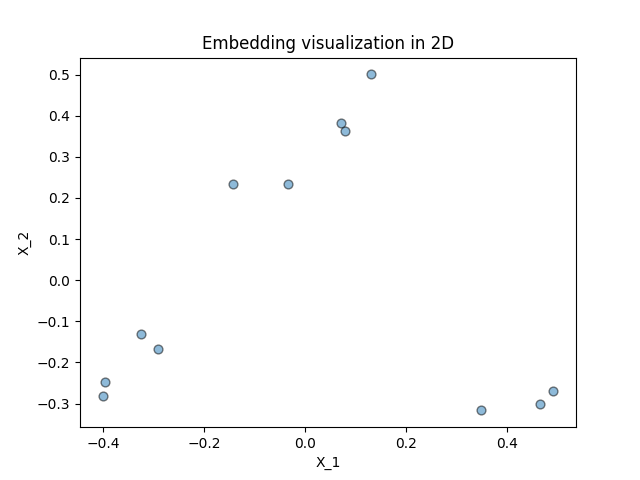

In [119]:
plot_2D(new_values[:,0], new_values[:,1], all_input_text)

<a id=section_six></a>

**3D plot**

Support for third party widgets will remain active for the duration of the session. To disable support:

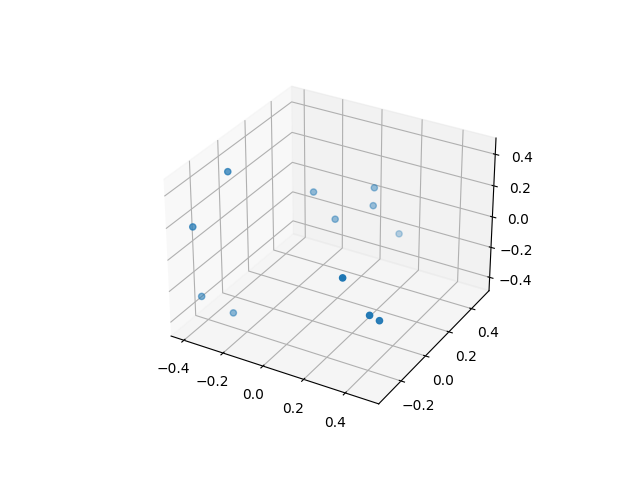

In [120]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(new_values[:, 0], new_values[:, 1], new_values[:, 2])

In [121]:
from google.colab import output
output.disable_custom_widget_manager()

In [122]:
print("technology_sen_1 vs technology_sen_2:", compute_cosine_similarity(embeddings,0,1))
print("technology_sen_1 vs stock_market_sen_1:", compute_cosine_similarity(embeddings,0,10))

technology_sen_1 vs technology_sen_2: 0.58590513
technology_sen_1 vs stock_market_sen_1: 0.34626064


## Simple RAG

Let's consider `embeddings` list to be our Vector database and search a query over it and return the results

<a id=rag_1></a>
**Step 1: Vectorize the user's query**

In [123]:
query = "What is the use of AI?"
q_v = embedding_model.encode(query)

<a id=rag_2></a>
**Step 2: Perfrom vector search between the user's query and the vector database**

In [124]:
def search(embeddings:List, q_v:List)->List[float]:
    """
    Search for the cosine similarity scores between a query vector (q_v) and a list of embedding vectors.

    Parameters:
        embeddings (List[List[float]]): A list of embedding vectors.
        q_v (List[float]): The query vector for which the cosine similarity scores are calculated.

    Returns:
        List[float]: A list of cosine similarity scores between the query vector and each embedding vector.
    """
    scores = []
    for vec in embeddings:
        scores.append(cosine_similarity([vec], [q_v])[0][0])
    return scores

score_list = search(embeddings, q_v)
print(score_list)

[0.5916381, 0.4527067, 0.3963284, 0.35941494, 0.36035103, 0.3909148, 0.30285978, 0.36743093, 0.29912883, 0.3368232, 0.22092865, 0.35857424]


<a id=rag_3></a>
**Step 3: Retrieve the top `n` results.**

In [125]:
n = 4
sorted_indices = np.argsort(score_list)[::-1]
top_n_indices = sorted_indices[:n]
top_n_indices

retrieved_content = []
for i in top_n_indices:
    print(all_input_text[i], "\n")
    retrieved_content.append(all_input_text[i])

Artificial intelligence is revolutionizing industries by automating tasks, analyzing vast amounts of data, and providing new insights and efficiencies. 

The advent of 5G technology promises to enhance mobile connectivity, enabling faster data transfer rates and more reliable communication. 

Blockchain technology, originally developed for cryptocurrencies, is now being explored for its potential to improve transparency and security in various sectors. 

Cryptocurrencies have emerged as a new asset class, with Bitcoin leading the way as the most well-known digital currency. 



<a id=rag_4></a>

**Step 4: Prepare the LLM's input using the retrieved content and the user's query**

We want to Pass the retrieved content along with the user's query to a LLM to get the proper response. The role of the LLM is to see whether the retrieved content contain the answer to the user's question and provide a clean and organized response.

In [126]:
llm_system_role = "As a helpful chatbot, your role is to assist users by analyzing their questions alongside retrieved content and provide an answer.\
        Do Not Use your own knowledge to generate answers and look in the retrieved content for answers. If you do not know the answer for a query simple answer it as you don't know."
prompt = f"# Your role:{llm_system_role}\n\n# Retrieved content: {retrieved_content}\n\n# User's query: {query} \n\n# Answer: "
print(prompt)


# Your role:As a helpful chatbot, your role is to assist users by analyzing their questions alongside retrieved content and provide an answer.        Do Not Use your own knowledge to generate answers and look in the retrieved content for answers. If you do not know the answer for a query simple answer it as you don't know.

# Retrieved content: ['Artificial intelligence is revolutionizing industries by automating tasks, analyzing vast amounts of data, and providing new insights and efficiencies.', 'The advent of 5G technology promises to enhance mobile connectivity, enabling faster data transfer rates and more reliable communication.', 'Blockchain technology, originally developed for cryptocurrencies, is now being explored for its potential to improve transparency and security in various sectors.', 'Cryptocurrencies have emerged as a new asset class, with Bitcoin leading the way as the most well-known digital currency.']

# User's query: What is the use of AI? 

# Answer: 


<a id=rag_extra></a>

**Extra step for LLAMA: Prepare the model and its tokenizer**

* **NOTE:** Without quanitzation LLAMA2 7b requires minimum 24 GB of GPU memory. If you are running the model on colab, activate 8bit quantization.

In [127]:
# to empty GPU memory (If needed)
del embedding_model
torch.cuda.empty_cache()

In [128]:
# Use a pipeline as a high-level helper
from transformers import pipeline

pipe = pipeline("text2text-generation", model="google/flan-t5-base")

In [129]:
response1 = pipe(prompt, max_new_tokens=512)


In [130]:
print(response1)

[{'generated_text': 'automation of tasks, analyzing vast amounts of data, and providing new insights and efficiencies.'}]


# The LLM generated a proper answer from our retrieved contents. Hence our simple RAG works effectively.